# Chronometric Interferometry CLI Walkthrough

Reproduce the clean E1 beat-note experiment, capture the structured CLI JSON output, and visualize how the phase-slope estimator recovers a 13.5 ps propagation delay.

## What this notebook covers
- Launch the `run_experiment.py` CLI for a clean 2.4 GHz line-of-sight scenario
- Inspect the exported structured JSON summary
- Plot the beat note, unwrapped phase with slope fit, and τ residuals

In [1]:
from pathlib import Path
import json
import subprocess
import sys

import matplotlib.pyplot as plt
import numpy as np

PROJECT_ROOT = Path.cwd().resolve()
while PROJECT_ROOT != PROJECT_ROOT.parent and not (PROJECT_ROOT / 'src').exists():
    PROJECT_ROOT = PROJECT_ROOT.parent

if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))
if str(PROJECT_ROOT / 'src') not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT / 'src'))

from generate_hero_beat_note import generate_hero_signals, build_hero_figure


In [2]:
artifacts_dir = PROJECT_ROOT / 'docs' / 'examples' / 'artifacts'
artifacts_dir.mkdir(parents=True, exist_ok=True)
export_path = artifacts_dir / 'e1_cli_clean.json'

cmd = [
    sys.executable,
    str(PROJECT_ROOT / 'run_experiment.py'),
    '--band', '2.4GHz',
    '--channel-profile', 'line_of_sight',
    '--duration-ms', '2.0',
    '--sampling-rate-msps', '40',
    '--tau-ps', '13.5',
    '--delta-f-hz', '150',
    '--no-phase-noise',
    '--no-additive-noise',
    '--export', str(export_path),
]

result = subprocess.run(cmd, capture_output=True, text=True, check=True)
print(result.stdout)

with export_path.open('r', encoding='utf-8') as handle:
    summary = json.load(handle)
summary['summary']

🔬 Chronometric Interferometry — Experiment E1
RF band: 2.4GHz | TX 2.400000 GHz | RX 2.400000 GHz
Target τ: 13.500 ps | Residual Δf target: 0.000 Hz
Sampling: 40.00 MS/s for 2.00 ms | SNR: 35.0 dB
Nominal beat note: 150.000 Hz
Phase noise: disabled | Additive noise: disabled | Channel: line_of_sight

📈 Primary Estimates
  • τ estimate: 11.931 ps ± 6.644 ps
  • Δf estimate: 0.000 Hz ± 0.000 Hz
  • Beat frequency: 150.000 Hz (expected 150.000 Hz) | Quality: good

🎯 Validation Checks
  • Timing accuracy: ✅ |Δτ| = 1.569 ps (gate ≤ 19.932 ps)
  • Frequency bias: ✅ |Δf| = 0.000 Hz (gate ≤ 1.000 Hz)
  • Beat note match: ✅ |Δf_beat| = 0.000 Hz (gate ≤ 1.000 Hz)

📊 Performance Metrics
  • RMSE τ: 1.569 ps
  • RMSE Δf: 0.000 ppb
  • Success flag: ✅

📝 Exported structured data to /Volumes/VIXinSSD/DRIFTLOCKCHOIR/driftlockchoir-oss/docs/examples/artifacts/e1_cli_clean.json



{'metrics': {'rmse_timing_ps': 1.5693797007495096,
  'rmse_frequency_ppb': 4.5248731410652e-05,
  'convergence_time_s': 0.0,
  'iterations_to_convergence': 1},
 'success': True,
 'error_message': None,
 'analysis': {'tau_estimate_ps': 11.93062029925049,
  'tau_uncertainty_ps': 6.6440252724574265,
  'delta_f_estimate_hz': 0.0001085969553855648,
  'delta_f_uncertainty_hz': 1.726184583789089e-06,
  'beat_frequency_hz': 149.9998914732555,
  'expected_beat_frequency_hz': 150.0,
  'expected_residual_delta_f_hz': 0.0,
  'snr_db': 35.0,
  'quality': 'good',
  'method': 'phase_slope_single'},
 'validation': {'timing_error_ps': 1.5693797007495096,
  'frequency_error_hz': 0.0001085969553855648,
  'beat_frequency_error_hz': 0.00010852674449779443,
  'precision_gate_ps': 19.93207581737228,
  'frequency_gate_hz': 1.0,
  'beat_frequency_gate_hz': 1.0,
  'meets_precision': True,
  'meets_frequency': True,
  'meets_beat_frequency': True}}

In [3]:
from pprint import pprint

pprint(summary['summary'])

{'analysis': {'beat_frequency_hz': 149.9998914732555,
              'delta_f_estimate_hz': 0.0001085969553855648,
              'delta_f_uncertainty_hz': 1.726184583789089e-06,
              'expected_beat_frequency_hz': 150.0,
              'expected_residual_delta_f_hz': 0.0,
              'method': 'phase_slope_single',
              'quality': 'good',
              'snr_db': 35.0,
              'tau_estimate_ps': 11.93062029925049,
              'tau_uncertainty_ps': 6.6440252724574265},
 'error_message': None,
 'metrics': {'convergence_time_s': 0.0,
             'iterations_to_convergence': 1,
             'rmse_frequency_ppb': 4.5248731410652e-05,
             'rmse_timing_ps': 1.5693797007495096},
 'success': True,
 'validation': {'beat_frequency_error_hz': 0.00010852674449779443,
                'beat_frequency_gate_hz': 1.0,
                'frequency_error_hz': 0.0001085969553855648,
                'frequency_gate_hz': 1.0,
                'meets_beat_frequency': True,
     

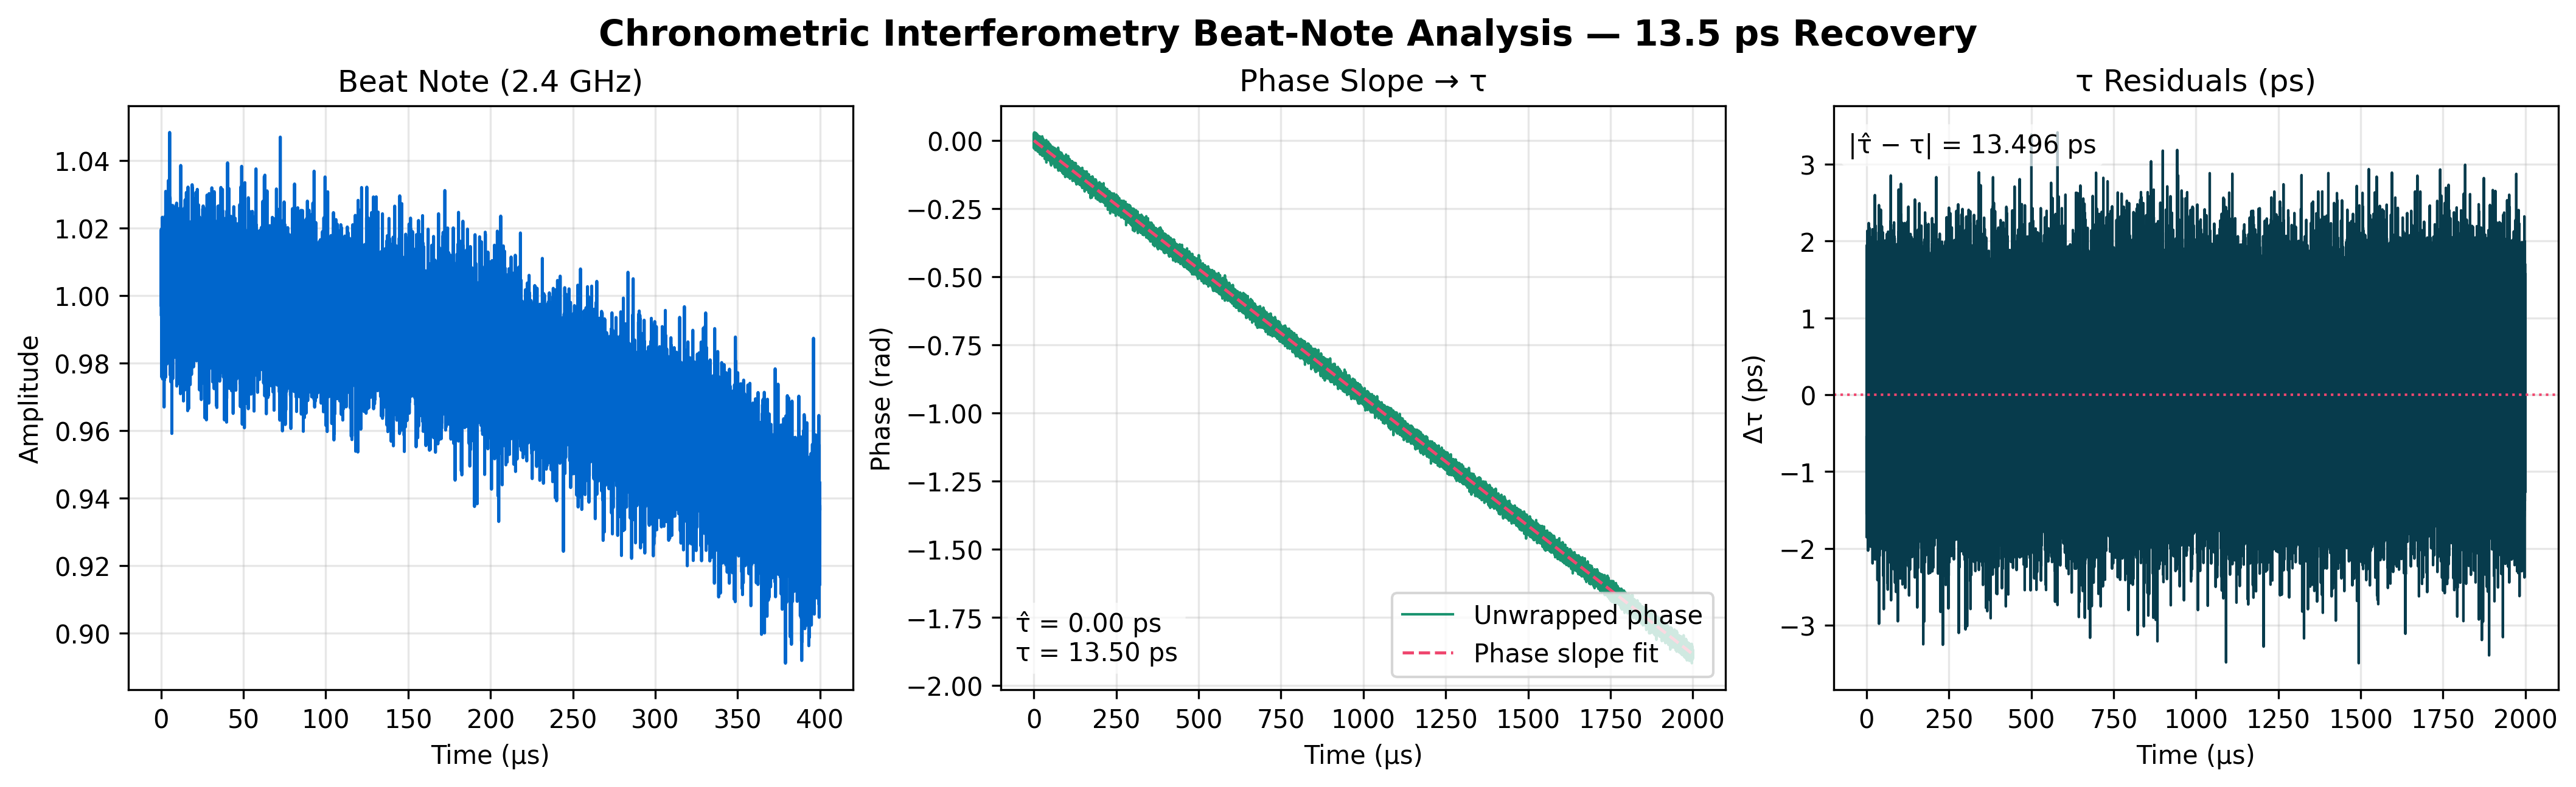

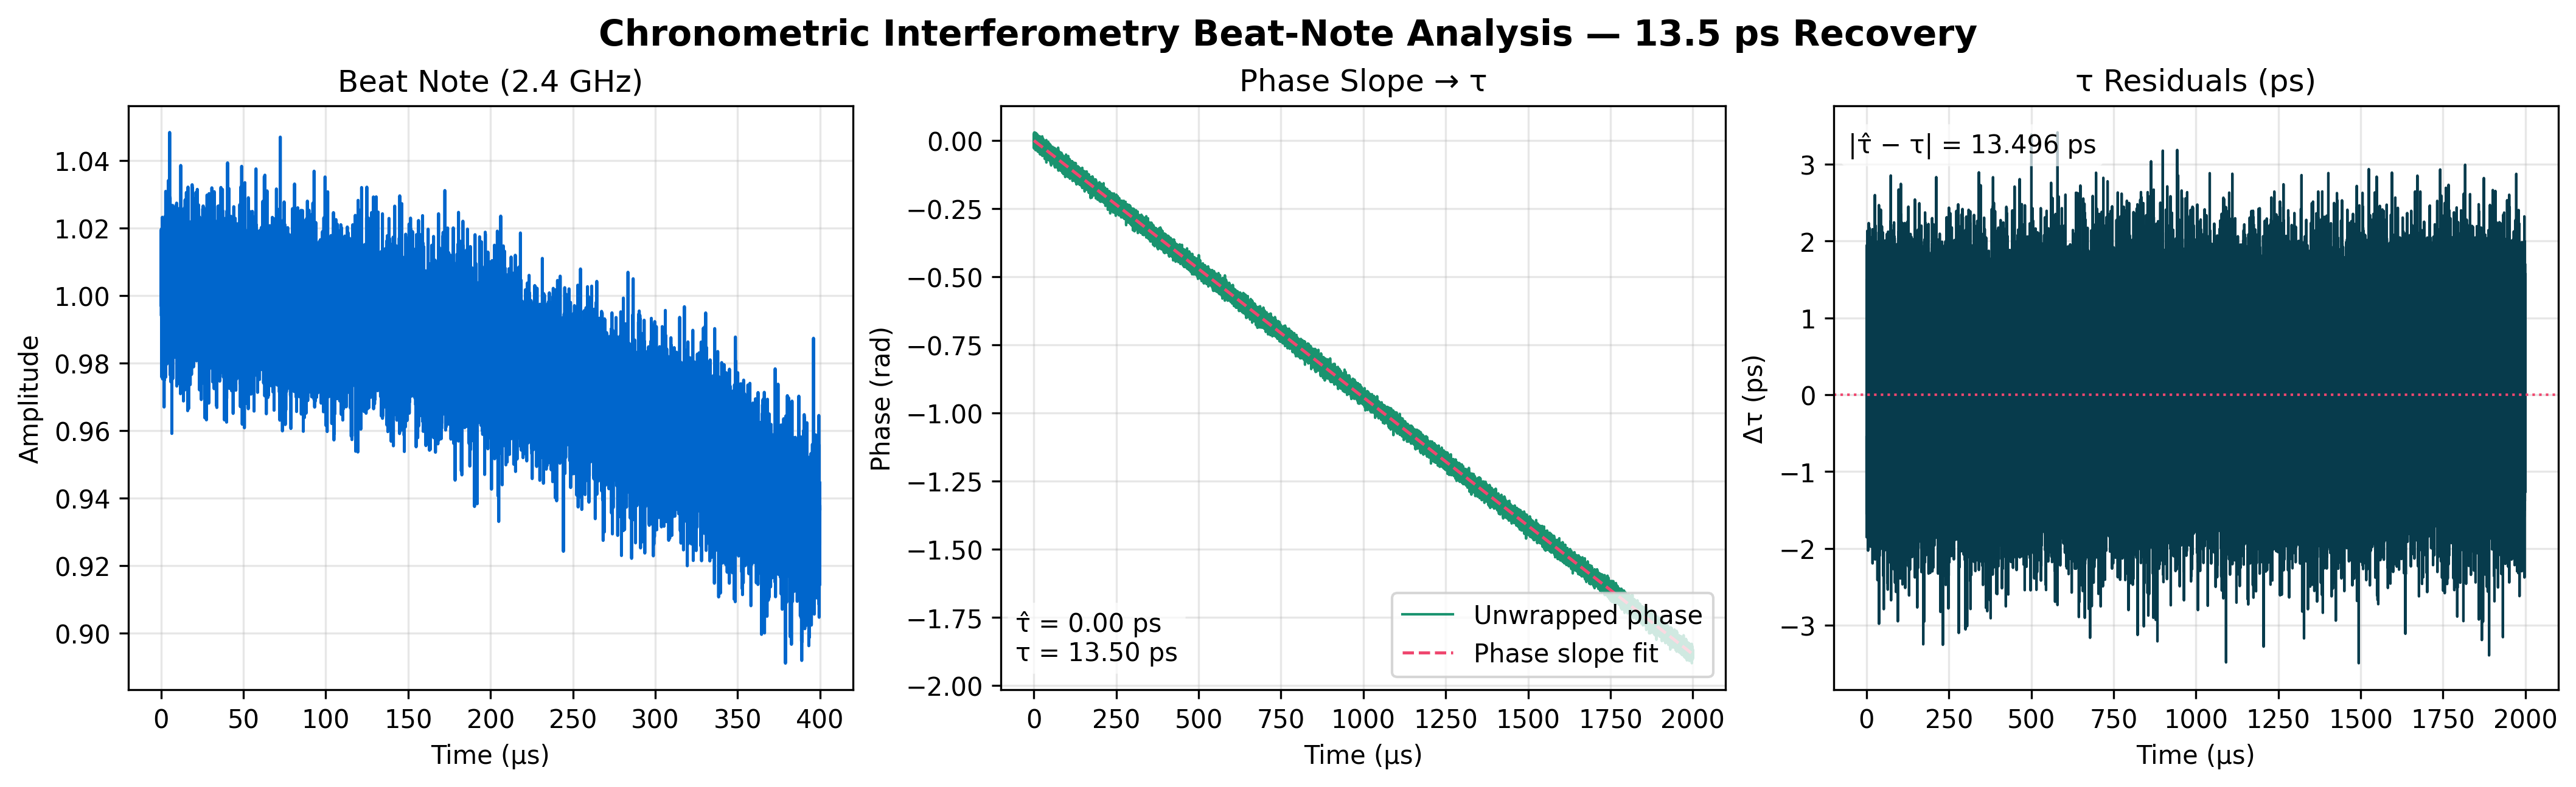

In [4]:
beat_note, processor, tx_freq, rx_freq, sampling_rate, true_tau = generate_hero_signals()
figure = build_hero_figure(beat_note, processor, tx_freq, rx_freq, sampling_rate, true_tau)
figure